<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Assignment7_kmeans(crime)__Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#importing libraries
import pandas as pd
import matplotlib.pylab as plt
from	sklearn.cluster	import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [43]:
# Kmeans on crime Data set 
data = pd.read_csv("/content/crime_data.csv")

In [44]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [45]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])
df_norm.head(5)  # Top 5 rows

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


###### screw plot or elbow curve ############

In [46]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

([<matplotlib.axis.XTick at 0x7faa836598e0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

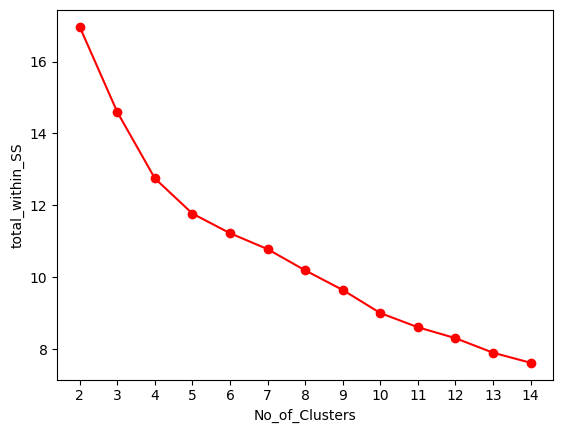

In [47]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [48]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [49]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
df_norm.head()
model.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 4, 4, 3, 4, 4, 1, 3, 4, 0, 1, 2, 4, 3, 2, 3, 3, 0, 2, 4, 1, 4,
       2, 0, 3, 2, 2, 4, 2, 1, 4, 4, 0, 2, 3, 3, 3, 1, 1, 0, 2, 0, 4, 1,
       2, 3, 3, 2, 2, 3], dtype=int32)

In [50]:
data['clusters']=model.labels_
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,4


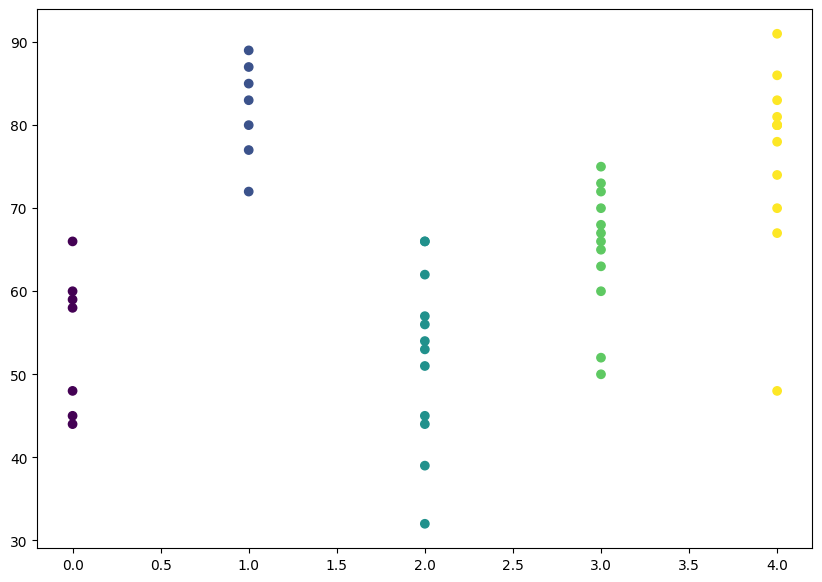

In [51]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clusters'],data['UrbanPop'], c=model.labels_)

In [52]:
# creating a csv file
data.to_csv("crime.csv",encoding="utf-8")